# Leaf Outline

The function in the cell below contains the code to identify the leaf and outline it. The function only take one input (parameter), the image path. The function provides two outputs:
* "image": Contains the image that was loaded
* "leaf_contour": Contain the contour/outline of the leaf identified

In [ ]:
def leaf_outline(image_path):
    # Import the required libraries
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

    # Load the image
    image = cv2.imread(image_path)

    # Display the image
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    # Convert the image to HSV color space
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Create masks for the calibration cube, leaf, and scars
    green_lower = np.array([35, 40, 40])
    green_upper = np.array([85, 255, 255])

    # Create a mask for the leaf, to identify the leaf contour
    green_mask = cv2.inRange(hsv_image, green_lower, green_upper)

    # Find contours of the leaf
    leaf_contours, _ = cv2.findContours(green_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    leaf_contour = max(leaf_contours, key=cv2.contourArea)

    # Optionally display the results visually
    cv2.drawContours(image, [leaf_contour], -1, (0, 0, 255), 2)
    # cv2.imshow("Leaf outline", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    # Display the original and annotated images
    plt.subplot(1, 2, 2)
    plt.title('Leaf outline')
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

    plt.show()

    return image, leaf_contour

# Testing

The following cells contain test for the function. Each ons used a different image and the results are analyzed to to validate if the function is working correctly.

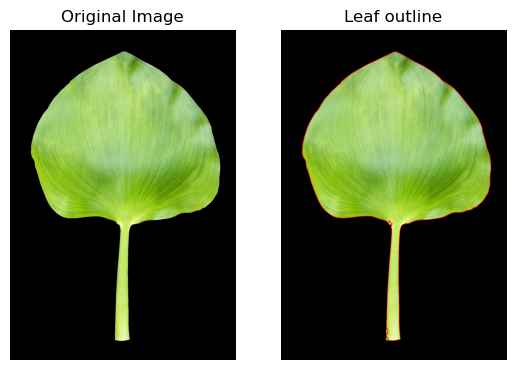

In [15]:
image, leaf_contour = leaf_outline("Leaf Outline - Sample Data/Original-leaf-black.png")

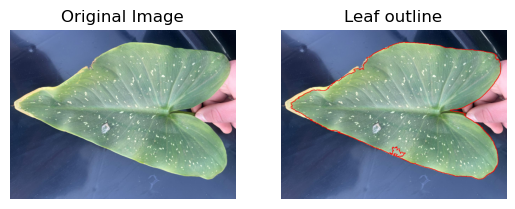

In [13]:
image, leaf_contour = leaf_outline("Leaf Outline - Sample Data/Leaf 1.jpeg")

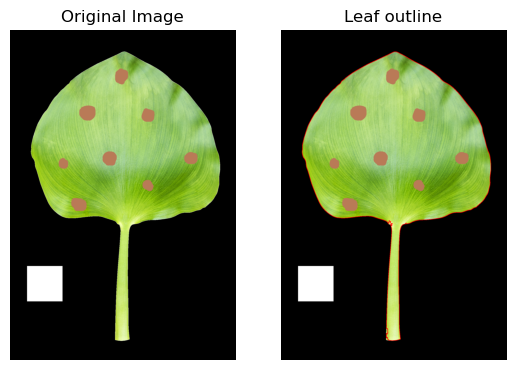

In [11]:
image, leaf_contour = leaf_outline("Leaf Outline - Sample Data/Leaf-with-scars-1.png")